The script follows Chapter-4 of the book "Deep Learning for Coders with fastai and PyTorch"  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *

Collecting a sample dataset from MNIST for image(number) recognition

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

Both the train and valid sets contain a collection of images for number 3 and 7

The ls function also gives the numer of files as (#n) at the beginning

In [5]:
#(path/'valid').ls()
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [7]:
im3_path = threes[20]
im3 = Image.open(im3_path)
im3

In [8]:
#array(im3)[10:20, 10:20] --> gives the same

#im3.shape --> 28*28
tensor(im3)[10:20, 10:20]


tensor([[  0,  88, 222, 254, 254, 254, 254, 171,  36,   0],
        [131, 246, 254, 254, 254, 254, 227,  29,   0,   0],
        [245, 254, 254, 254, 254, 200,  66,   0,   0,   0],
        [245, 254, 254, 254, 254, 249, 245, 240, 176, 144],
        [158, 251, 254, 254, 254, 254, 254, 254, 254, 254],
        [  0, 112, 177, 220, 254, 254, 254, 254, 254, 254],
        [  0,   0,   0,  11,  19,  48,  99,  95, 206, 254],
        [  0,   0,   0,   0,   0,   0,   0,   5, 171, 254],
        [  0,   0,   0,   0,   0,   0,  40, 147, 254, 254],
        [ 16,  33,  39,  32,  74, 200, 243, 254, 254, 254]], dtype=torch.uint8)

In [9]:
tensor(im3)[4:15,4:22]

tensor([[  0,   0,   0,   0,   6,  39,  63,  47, 226, 255, 218, 254, 254, 251,
         114,   0,   0,   0],
        [  0,   0,   0,   0,  72, 241, 254, 241, 254, 254, 254, 254, 254, 254,
         244, 155,  18,   0],
        [  0,   0,   0,   0,  86, 254, 254, 254, 254, 254, 254, 254, 254, 254,
         254, 254, 152,   0],
        [  0,   0,   0,   0,  10, 101, 156, 244, 213,  87, 108, 223, 254, 254,
         254, 254, 131,   0],
        [  0,   0,   0,   0,   0,   0,   0,  32,  12,  51, 232, 254, 254, 254,
         254, 175,   9,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  92, 223, 254, 254, 254, 254,
         169,  34,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  88, 222, 254, 254, 254, 254, 171,
          36,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 131, 246, 254, 254, 254, 254, 227,  29,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 245, 254, 254, 254, 254, 200,  66,   0,
           0,   0,   0,   0],
        [  0,   0, 

In [10]:
#slicing a portion and plotting
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,6,39,63,47,226,255,218,254,254,251,114,0,0,0
1,0,0,0,0,72,241,254,241,254,254,254,254,254,254,244,155,18,0
2,0,0,0,0,86,254,254,254,254,254,254,254,254,254,254,254,152,0
3,0,0,0,0,10,101,156,244,213,87,108,223,254,254,254,254,131,0
4,0,0,0,0,0,0,0,32,12,51,232,254,254,254,254,175,9,0
5,0,0,0,0,0,0,0,0,92,223,254,254,254,254,169,34,0,0
6,0,0,0,0,0,0,0,88,222,254,254,254,254,171,36,0,0,0
7,0,0,0,0,0,0,131,246,254,254,254,254,227,29,0,0,0,0
8,0,0,0,0,0,0,245,254,254,254,254,200,66,0,0,0,0,0
9,0,0,0,0,0,0,245,254,254,254,254,249,245,240,176,144,106,0


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

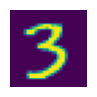

In [12]:
#Same as Image function of Jupyter, but show_image is from fastai
show_image(three_tensors[1]);

For every pixel position, the average over all the images of the intensity of that pixel is computed.

All images are combined into a list of a single three-dimensional tensor (or rank-3 tensor); done with PyTorch's 'stack' function

Then converted into floats, since in PyTorch operations as mean requires float types

The individual values in the rank-3 tensor are also normalized with the highest value of the itensity, i.e., 255

In [13]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens.shape
##There are 6265 images, each of size 28*28 pixels

torch.Size([6265, 28, 28])

**rank** is the number of axes or dimensions in a tensor; **shape** is the size of each axis of a tensor

In [14]:
#Either function gives the rank of the tensor

len(stacked_sevens.shape)
#stacked_sevens.ndim

3

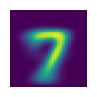

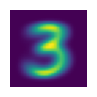

In [15]:
#For every pixel position, the average of that pixel over all images

mean3 = stacked_threes.mean(0)

mean7 = stacked_sevens.mean(0)
show_image(mean7); show_image(mean3);

A distinction from a random 3 or 7 is made by determining the difference between the random number and the mean using **MAE** and **RMSE**

Smaller the error, closer the similarities between random and mean

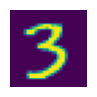

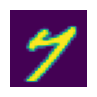

In [16]:
rand_3 = stacked_threes[1]
rand_7 = stacked_sevens[1]

show_image(rand_3); show_image(rand_7);

In [17]:
dist_3_abs = (rand_7 - mean3).abs().mean()
dist_3_sqr = ((rand_7 - mean3)**2).mean().sqrt()


dist_7_abs = (rand_7 - mean7).abs().mean()
dist_7_sqr = ((rand_7 - mean7)**2).mean().sqrt()

dist_3_abs,dist_3_sqr, dist_7_abs,dist_7_sqr

(tensor(0.1854), tensor(0.3271), tensor(0.1304), tensor(0.2585))

In [18]:
dist_3_abs = (rand_3 - mean3).abs().mean()
dist_3_sqr = ((rand_3 - mean3)**2).mean().sqrt()


dist_7_abs = (rand_3 - mean7).abs().mean()
dist_7_sqr = ((rand_3 - mean7)**2).mean().sqrt()

dist_3_abs,dist_3_sqr, dist_7_abs,dist_7_sqr

(tensor(0.1114), tensor(0.2021), tensor(0.1586), tensor(0.3021))

These are considered as *loss functions* in ML lingo.

In PyTorch, MSE can be determined using function 'l1_loss' 

In [19]:
l_mae = F.l1_loss(rand_3.float(),mean7)
l_rmse = F.mse_loss(rand_3,mean7).sqrt()

l_mae, l_rmse

(tensor(0.1586), tensor(0.3021))

Using validation data for cross checking

In [20]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Defining a function to determine MAE

In the function .mean(-1, -2), the argument (-1, -2) defines the dimensions along which the mean will be computed

Since the tensors are of the shape (n, 28, 28), i.e., n images(files) of dimension 28*28, it is asking to determine the mean along those dimension

In [21]:
#Defining a function to determine MAE

def MAE_calc(a,b): return (a-b).abs().mean((-1,-2))

MAE_calc(rand_3, mean3) #same as dist_3_abs

tensor(0.1114)

In [22]:
#Determing MAE across validation set

valid_3_mae = MAE_calc(valid_3_tens, mean3)
valid_3_mae, valid_3_mae.shape

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [23]:
#Defining a Boolean to state 3 or 7

def is_3(x): return MAE_calc(x,mean3) < MAE_calc(x,mean7)

In [24]:
is_3(rand_3), is_3(rand_3).float()

(tensor(True), tensor(1.))

In [25]:
is_3(valid_3_tens), is_3(valid_3_tens).float()

(tensor([ True, False, False,  ...,  True,  True, False]),
 tensor([1., 0., 0.,  ..., 1., 1., 0.]))

In [26]:
accuracy_3s = is_3(valid_3_tens).float().mean()

accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))